## 4 Radar

Simulation of the principle of the radar. A radar system is composed of an **antenna** that emits radio waves and a **detector** for these waves. When an object reflects the waves, the detector records this **echo** with a *_time delay_* corresponding to the travel time of the waves. In order to be easily recognizable, the sent signal has to have a easy to use shape. A **chirped sine function**, where the period of the sine changes with time, is often used for that purpose,
$$x(t) = \sin{(2\pi f(t + 2\pi)t)}$$

### 4.1 Plot signal

Create a `time` vector going from 0 to 20, and the vector $x$ corresponding to the chirped signal, with a frequency $f=0.1$. Plot this signal and check that the number of points is enough.

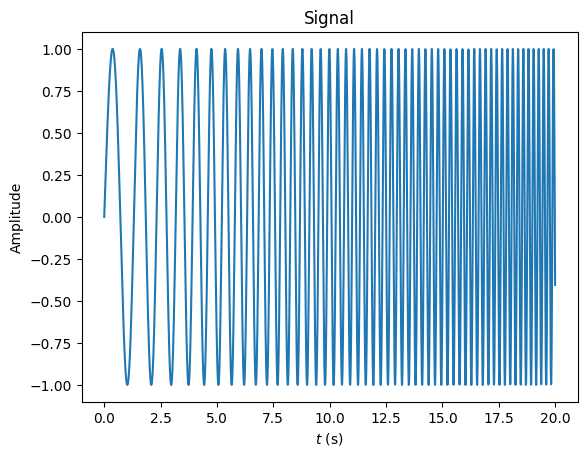

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt

# Create time vector
t0 = 0
tf = 20
N = 3000
time = np.linspace(t0, tf, N)

# Create signal
freq = 0.1      # Frequency in Hz
signal = np.sin(2 * np.pi * freq * time * (time + 2 * np.pi))

# Plot signal
plt.plot(time, signal)
plt.xlabel(r'$t$ (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.show()

### 4.2 Same until time 100

This new array will be the base for the simulation of the detected signal.

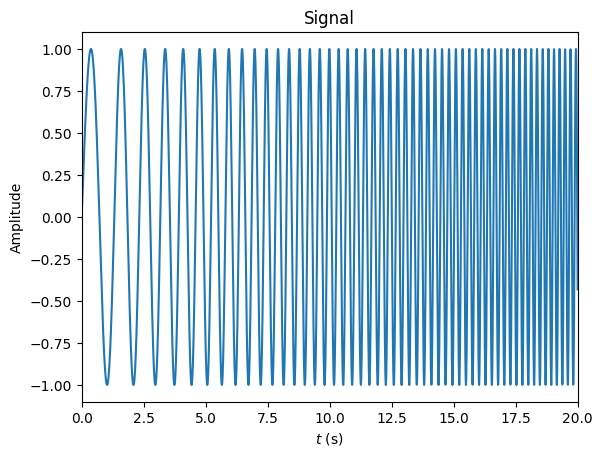

In [2]:
# Create time vector
t0 = 0
tf = 100
N = 20000
time = np.linspace(t0, tf, N)

# Create signal
freq = 0.1      # Frequency in Hz
signal = np.sin(2 * np.pi * freq * time * (time + 2 * np.pi))

# Plot signal
plt.plot(time, signal)
plt.xlabel(r'$t$ (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.xlim([0, 20])
plt.show()

In order to take into account the contribution from environmental and detection noises, create a `noise` vector with the `randn` function.

In [3]:
noise = np.random.randn(len(signal))
print(noise)

[ 2.49013721 -0.44043795 -0.03882881 ... -0.00272093 -0.52282411
 -0.94216879]


### 4.3 Detected signal

Create a detected signal `y` corresponding to the **addition** of the `noise` and a fraction, $\alpha$, (take 0.3) of the signal `x` delayed with an arbitrary `i` index. Draw both the `noise` and `y` signals.

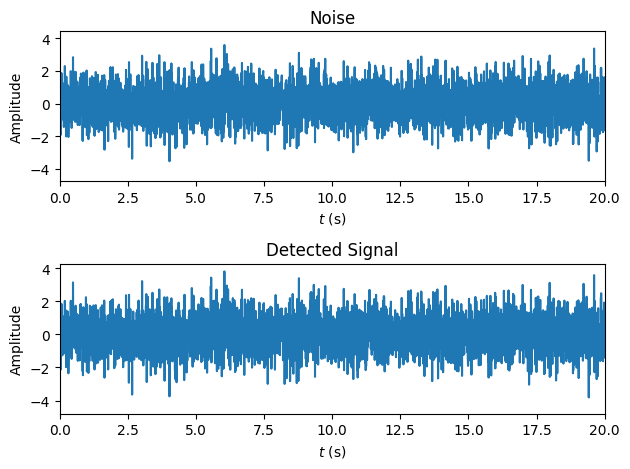

In [5]:
# Detected signal
alpha = 0.3 # Attenuation factor
retard_index = 6000
retarded_signal = np.roll(signal, retard_index)     # As it is a periodic function the values are the same but delayed
detected_signal = alpha * retarded_signal + noise

# Plot noise and detected signal
plt.subplot(2,1,1)
plt.plot(time, noise)
plt.xlabel(r'$t$ (s)')
plt.ylabel('Amplitude')
plt.title('Noise')
plt.xlim([0,20])
plt.subplot(2,1,2)
plt.plot(time, detected_signal)
plt.xlabel(r'$t$ (s)')
plt.ylabel('Amplitude')
plt.title('Detected Signal')
plt.xlim([0,20])
plt.tight_layout()
plt.show()

#### Can you spot the presence of the `x` signal in the detected signal `y`?

By no means.

### 4.4 Cross correlation

CC between `x` and `noise`, & `x` and `y`, using `xcorr`.
Plot these 2 correlations and find the value of the delay.

Reading the help page of `xcorr` is suggested, due to small differences between the continuous signal version of the correlation and this discrete and finite signals one.

In [ ]:
# Correlation between signal and noise
corr_x_noise = np.correlate(signal, noise)

# Plot it